In [6]:
#imports
!pip install celluloid
import matplotlib.pyplot as plt
from celluloid import Camera
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.preprocessing import minmax_scale
import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Gierer Meinhardt Model

### Activator u
### Inhibitor v
### Source Density S

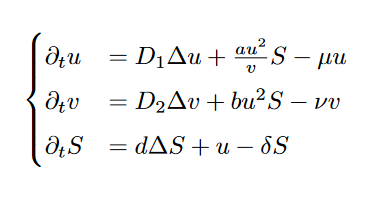

In [7]:
#initializing simulation plane
N=32
dim = N**2
dx = 1/(N-1)

In [8]:
#model parameter values
D1 = 0.0002
D2 = 0.01

a = 2
b = 1
mu = 1
nu = 4

k = 0.002

d = 3
delta = 3

In [9]:
#Delta2D computes the finite difference approximation of the Laplace
#operator with Neumann boundary conditions in the 2D squared domain.
#   INPUT
#   y : input function values, stored in 1D vector
#   dx : spatial step of the grid (scalar value)
#   OUTPUT
#   dy : output function values, stored in 1D vector

def delta2d(y,dx):
  y = y.reshape(-1,1)
  N = int(np.sqrt(len(y)))
  U = np.reshape(y,(N,N))
  
  Ur = np.hstack([U[:,1:],U[:,-1].reshape(-1,1)])
  Ul = np.hstack([U[:,0].reshape(-1,1), U[:,:-1]])
  Ut = np.vstack([U[0,:].reshape(-1,1).T, U[:-1,:]])
  Ub = np.vstack([U[1:,:], U[-1,:].reshape(-1,1).T])

  dU = (Ur+Ul+Ut+Ub - np.multiply(4,U))/dx**2
  dy = dU.ravel().reshape(-1,1)
  return(dy)

In [10]:
#source
def S(y):
  return(y[2*dim:3*dim].reshape(-1,1))

# u
def u(y):
  return(y[:dim].reshape(-1,1))

# v
def v(y):
  return(y[dim:2*dim].reshape(-1,1))
#-------------------------------------------------------------------------------------
#activator eq4
def activator(y):
  activator = D1* delta2d(y[:dim],dx) + ((a*u(y)**2/(1+k*u(y)**2))/v(y) - mu*u(y)) * S(y)
  return(activator)

#inhibitor eq3
def inhibitor(y):
  inhibitor = D2* delta2d(y[dim:2*dim],dx) + (b*u(y)**2 - nu*v(y))* S(y)
  return(inhibitor)
#-------------------------------------------------------------------------------------
# #activator eq2
# def activator(y):
#   activator = D1* delta2d(y[:dim],dx) + a*u(y)**2/v(y) * S(y) - mu*u(y)
#   return(activator)

# #inhibitor eq2
# def inhibitor(y):
#   inhibitor = D2* delta2d(y[dim:2*dim],dx) + b*u(y)**2 * S(y) - nu*v(y)
#   return(inhibitor)
#-------------------------------------------------------------------------------------
# #activator no source eq1
# def activator_no_source(y):
#   activator = D1* delta2d(y[:dim],dx) + a*u(y)**2/v(y) - mu*u(y)
#   return(activator)

# #inhibitor_no_source eq1
# def inhibitor_no_source(y):
#   inhibitor = D2* delta2d(y[dim:2*dim],dx) + b*u(y)**2 - nu*v(y)
#   return(inhibitor)
#-------------------------------------------------------------------------------------
#source density
def source(y):
  source = d* delta2d(y[2*dim:3*dim],dx) + u(y) - delta * S(y)
  return(source)

#initial state
IC = np.array(1+0.01*np.random.rand(3*dim))
IC_no_source = np.array(1+0.01*np.random.rand(2*dim))
#time steps
tc = [0,200]

start = time.time()
#ode solver using scipy.integrate.solve.ivp for gierer-meinhardt model
# gm_rhs = lambda t,y: [activator_no_source(y),inhibitor_no_source(y)]
# sol = solve_ivp(gm_rhs,tc,IC_no_source,method='LSODA',vectorized=True)

#ode solver using scipy.integrate.solve.ivp for gierer-meinhardt model with source density
gms_rhs = lambda t,y: [activator(y),inhibitor(y),source(y)]
sol = solve_ivp(gms_rhs,tc,IC,method='LSODA',vectorized=True)

#solutions
t = sol.t
y = sol.y.T

end = time.time()
print(end - start)

106.85319256782532


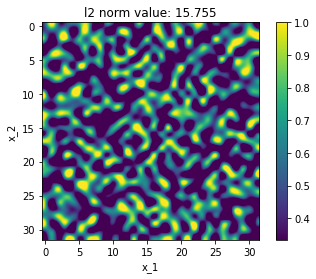

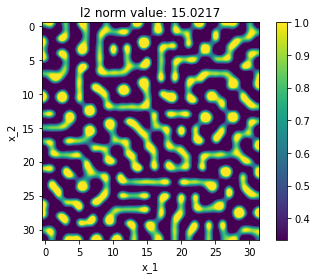

In [13]:
#first instance of the simulation
image = y[1,:dim].reshape((N,N))
image = minmax_scale(image)

plt.imshow(image,interpolation='lanczos',vmin=np.max(image)/3)
plt.colorbar()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('l2 norm value: '+str(round(np.linalg.norm(image,2),4)))
plt.savefig('simulation4_first.jpg')
plt.show()

#final instance of the simulation
image = y[-1,:dim].reshape((N,N))
image = minmax_scale(image)

plt.imshow(image,interpolation='lanczos',vmin=np.max(image)/3)
plt.colorbar()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('l2 norm value: '+str(round(np.linalg.norm(image,2),4)))
plt.savefig('simulation4_last.jpg')
plt.show()

In [11]:
start = time.time()
#animaing each instance through celluloid.Camera.animate
fig = plt.figure(dpi=100)
camera = Camera(fig)
for i in range(len(y)):
  image = y[i,:dim].reshape((N,N))
  image = minmax_scale(image)
  plt.imshow(image,interpolation='lanczos',vmin=np.max(image)/3)
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.title('Activator Concentrations of Gierer-Meinhardt Model')
  camera.snap()
plt.colorbar()
animation = camera.animate()
#saving animation
animation.save('simulation4.gif', writer='pillow', fps=60)
plt.close()
end = time.time()
print(end - start)
#saving parameter values
details = str(['D1',D1,'D2',D2,'a',a,'b',b,'mu',mu,'nu',nu,'d',d,'delta',delta])
with open('simulation4.txt', 'w') as a:
        a.write(details)

106.06110429763794
